In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [2]:
df = pd.read_fwf("portfolio100.txt", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,196307,2.1276,-2.3370,-1.2280,-2.6984,-1.7699,2.2134,-4.5496,-1.6598,-2.2403,...,-2.7823,0.2251,-0.8488,1.1879,3.0036,0.5386,0.6380,-0.4006,1.0496,3.9856
1,196308,4.8658,6.0631,0.1639,7.2770,1.1769,2.3169,0.7068,1.3503,-0.3678,...,5.0300,7.0651,6.5539,4.9193,5.9252,4.7108,4.0692,5.4019,6.5694,8.2962
2,196309,-0.9962,-2.3301,-0.5921,-2.5245,-1.8076,0.8903,1.9394,1.1314,-3.3908,...,-0.2978,-1.2447,-0.5466,-1.1210,-3.2242,-2.8977,0.1279,1.1137,-0.5205,-1.8119
3,196310,0.6441,2.1924,2.9654,-2.0956,-1.7827,4.8031,0.7487,3.9617,-0.3635,...,2.6970,1.0780,0.7655,1.5320,0.4140,0.2659,3.5241,6.5133,11.3120,11.4192
4,196311,-3.6040,-3.4157,2.1402,-1.5655,-2.2487,-5.1347,-3.8505,-4.0434,-2.6483,...,2.3890,-1.1899,-1.7024,-0.8322,-1.9991,-0.7021,2.2096,-1.3830,-6.5086,2.4425


# Punto 8

In [3]:
df['media'] = df.drop([0], axis=1).mean(axis=1)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,media
0,196307,2.1276,-2.3370,-1.2280,-2.6984,-1.7699,2.2134,-4.5496,-1.6598,-2.2403,...,0.2251,-0.8488,1.1879,3.0036,0.5386,0.6380,-0.4006,1.0496,3.9856,-0.714506
1,196308,4.8658,6.0631,0.1639,7.2770,1.1769,2.3169,0.7068,1.3503,-0.3678,...,7.0651,6.5539,4.9193,5.9252,4.7108,4.0692,5.4019,6.5694,8.2962,5.029534
2,196309,-0.9962,-2.3301,-0.5921,-2.5245,-1.8076,0.8903,1.9394,1.1314,-3.3908,...,-1.2447,-0.5466,-1.1210,-3.2242,-2.8977,0.1279,1.1137,-0.5205,-1.8119,-1.859055


In [4]:
df['media_binaria'] = df['media'].transform(lambda x: 1 if x >= 0 else 0)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,media,media_binaria
0,196307,2.1276,-2.3370,-1.2280,-2.6984,-1.7699,2.2134,-4.5496,-1.6598,-2.2403,...,-0.8488,1.1879,3.0036,0.5386,0.6380,-0.4006,1.0496,3.9856,-0.714506,0
1,196308,4.8658,6.0631,0.1639,7.2770,1.1769,2.3169,0.7068,1.3503,-0.3678,...,6.5539,4.9193,5.9252,4.7108,4.0692,5.4019,6.5694,8.2962,5.029534,1
2,196309,-0.9962,-2.3301,-0.5921,-2.5245,-1.8076,0.8903,1.9394,1.1314,-3.3908,...,-0.5466,-1.1210,-3.2242,-2.8977,0.1279,1.1137,-0.5205,-1.8119,-1.859055,0


In [5]:
df_binaria = df.drop([0, 'media_binaria', 'media'], axis=1).applymap(lambda x: 1 if x >= 0 else 0)
df_binaria['media_binaria'] = df['media_binaria']
df_binaria.head(3)

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,media_binaria
0,1,0,0,0,0,1,0,0,0,1,...,1,0,1,1,1,1,0,1,1,0
1,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [6]:
metricas = pd.DataFrame(columns=['Jaccard','Dice','Pearson'])
for i in range(1, 101):
    cm = confusion_matrix(df_binaria['media_binaria'], df_binaria[i])
    a = cm[0][0]
    b = cm[0][1]
    c = cm[1][0]
    d = cm[1][1]
    jaccard  = a/(a+b+c)
    dice = 2*a / (2*a+b+c)
    pearson = (a*d - b*c) / (np.sqrt((a+c)*(b+d)*(a+b)*(c+d)))
    metricas.loc[i] = [jaccard , dice , pearson]

In [7]:
metricas['dice_metric'] = metricas.sort_values(by = ['Dice'])['Dice'].index
metricas['pearson_metric'] = metricas.sort_values(by = ['Pearson'])['Pearson'].index
metricas['jaccard_metric'] = metricas.sort_values(by = ['Jaccard'])['Jaccard'].index

print('10 Mas parecidos')
metricas.drop(columns=['Jaccard','Dice','Pearson']).tail(10).style.hide_index()



10 Mas parecidos


dice_metric,pearson_metric,jaccard_metric
29,57,29
57,29,57
58,58,58
38,38,38
28,27,28
27,50,27
50,28,50
49,49,49
30,30,30
39,39,39


In [8]:
print('\n10 Menos parecidoss')
metricas.drop(columns=['Jaccard','Dice','Pearson']).tail(10).style.hide_index()


10 Menos parecidoss


dice_metric,pearson_metric,jaccard_metric
29,57,29
57,29,57
58,58,58
38,38,38
28,27,28
27,50,27
50,28,50
49,49,49
30,30,30
39,39,39


# Punto 9

In [9]:
df9 = df.drop(columns = [0, 'media_binaria', 'media'])

In [10]:
df9_binaria = df9.applymap(lambda x: 1 if x >= 0 else 0)
df9_binaria['Fecha'] = df[0]

In [11]:
df9_binaria.head(3)
filas, columnas = df9_binaria.shape

In [12]:
metricas9 = {}
mediana = np.inf
indexMediana = 0
for i in range(0,filas):
    for j in range(0,filas):
        if(i==j): continue
        jaccard  = distance.jaccard(df9_binaria.iloc[i],df9_binaria.iloc[j])
        if(mediana > jaccard):
            mediana = jaccard
            indexMediana = i

In [13]:
d = []
for i in range (0, filas):
    jaccard  = distance.jaccard(df9_binaria.iloc[i],df9_binaria.iloc[indexMediana])
    d.append(jaccard)

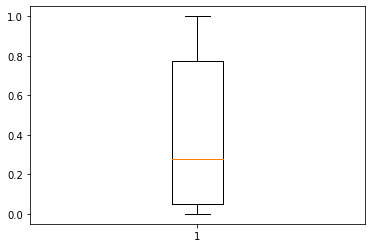

In [14]:
plt.boxplot(d)
plt.show()

In [15]:
p10 = np.percentile(d, 10, interpolation='linear')
I = np.argwhere(d < p10) #Retorna los indices

In [16]:
df[0].ix[I[:,0]]

18     196501
42     196701
57     196804
62     196809
75     196910
101    197112
120    197307
135    197410
138    197501
141    197504
150    197601
161    197612
172    197711
177    197804
186    197901
188    197903
193    197908
196    197911
225    198204
229    198208
231    198210
232    198211
253    198408
258    198501
268    198511
274    198605
282    198701
295    198802
312    198907
322    199005
        ...  
331    199102
361    199308
373    199408
406    199705
407    199706
410    199709
415    199802
460    200111
472    200211
477    200304
502    200505
526    200705
548    200903
549    200904
552    200907
560    201003
564    201007
566    201009
569    201012
579    201110
582    201201
600    201307
602    201309
607    201402
613    201408
619    201502
627    201510
632    201603
636    201607
666    201901
Name: 0, Length: 61, dtype: int64